In [1]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , OneHotEncoder , normalize , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df=pd.read_csv("tmdb_5000_movies.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2435 entries, 0 to 2434
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                2435 non-null   int64  
 1   genres                2435 non-null   object 
 2   homepage              1009 non-null   object 
 3   id                    2435 non-null   int64  
 4   keywords              2435 non-null   object 
 5   original_language     2435 non-null   object 
 6   original_title        2435 non-null   object 
 7   overview              2435 non-null   object 
 8   popularity            2435 non-null   float64
 9   production_companies  2435 non-null   object 
 10  production_countries  2435 non-null   object 
 11  release_date          2434 non-null   object 
 12  revenue               2434 non-null   float64
 13  runtime               2434 non-null   float64
 14  spoken_languages      2434 non-null   object 
 15  status               

In [6]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,2.435000e+03,2435.000000,2435.000000,2.434000e+03,2434.000000,2434.000000,2434.000000
mean,5.254422e+07,44455.205339,31.388082,1.433724e+08,112.370583,6.167379,1087.672145
std,4.593765e+07,75128.781613,39.568860,2.055057e+08,21.294885,0.870716,1533.436475
min,0.000000e+00,12.000000,0.068228,0.000000e+00,0.000000,0.000000,0.000000
25%,2.400000e+07,6439.500000,11.634237,1.994302e+07,98.000000,5.700000,205.000000
50%,4.000000e+07,11113.000000,22.001408,7.370537e+07,109.000000,6.200000,515.000000
75%,7.000000e+07,43762.000000,39.886537,1.758958e+08,123.000000,6.700000,1302.500000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,9.300000,13752.000000


In [7]:
df.describe(include='object')

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title
count,2435,1009,2435,2435,2435,2435,2435,2435,2434,2434,2434,2251,2434
unique,835,989,2335,14,2435,2435,2016,279,1925,362,1,2245,2434
top,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.missionimpossible.com/,[],en,How She Move,After the death of Raya Green's(Rutina Wesley)...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2014-12-25,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Who's next?,Superman IV: The Quest for Peace
freq,141,4,82,2367,1,1,33,1598,7,1614,2434,2,1


In [8]:
df['genres']

,genres
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
...,...
2430,"[{""id"": 27, ""name"": ""Horror""}]"
2431,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""..."
2432,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam..."
2433,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
import ast

def extract_first_name(x):
    if x != "Unknown" and isinstance(x, str):
        try:
            data = ast.literal_eval(x)
            if len(data) > 0 and 'name' in data[0]:
                return data[0]['name']
        except:
            pass
    return "Unknown"

In [11]:
df['category']   = df['genres'].apply(extract_first_name)
df['production_country'] = df['production_countries'].apply(extract_first_name)



In [12]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year
df=df.drop(columns=["release_date"])
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,category,production_country,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0,Action,United States of America,2009.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0,Adventure,United States of America,2007.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466.0,Action,United Kingdom,2015.0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0,Action,United States of America,2012.0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124.0,Action,United States of America,2012.0


In [13]:
df=df.drop(columns=["homepage","id","tagline","keywords","status","overview","original_title",'genres',
    'production_companies',
    'production_countries',
    'spoken_languages','genres' ,'title'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2435 entries, 0 to 2434
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   budget              2435 non-null   int64  
 1   original_language   2435 non-null   object 
 2   popularity          2435 non-null   float64
 3   revenue             2434 non-null   float64
 4   runtime             2434 non-null   float64
 5   vote_average        2434 non-null   float64
 6   vote_count          2434 non-null   float64
 7   category            2435 non-null   object 
 8   production_country  2435 non-null   object 
 9   year                2434 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 190.4+ KB


In [14]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
missing_cat = df[cat_cols].isnull().sum()
missing_cat[missing_cat > 0]
missing_cat

,0
original_language,0
category,0
production_country,0


In [15]:
df[cat_cols] = df[cat_cols].fillna("Unknown")
df.head()

,budget,original_language,popularity,revenue,runtime,vote_average,vote_count,category,production_country,year
0,237000000,en,150.437577,2.787965e+09,162.0,7.2,11800.0,Action,United States of America,2009.0
1,300000000,en,139.082615,9.610000e+08,169.0,6.9,4500.0,Adventure,United States of America,2007.0
2,245000000,en,107.376788,8.806746e+08,148.0,6.3,4466.0,Action,United Kingdom,2015.0
3,250000000,en,112.312950,1.084939e+09,165.0,7.6,9106.0,Action,United States of America,2012.0
4,260000000,en,43.926995,2.841391e+08,132.0,6.1,2124.0,Action,United States of America,2012.0


In [16]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
missing_num = df[num_cols].isnull().sum()
missing_num[missing_num>0]
missing_num

,0
budget,0
popularity,0
revenue,1
runtime,1
vote_average,1
vote_count,1
year,1


In [17]:
df[num_cols] = df[num_cols].fillna(0.0)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2435 entries, 0 to 2434
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   budget              2435 non-null   int64  
 1   original_language   2435 non-null   object 
 2   popularity          2435 non-null   float64
 3   revenue             2435 non-null   float64
 4   runtime             2435 non-null   float64
 5   vote_average        2435 non-null   float64
 6   vote_count          2435 non-null   float64
 7   category            2435 non-null   object 
 8   production_country  2435 non-null   object 
 9   year                2435 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 190.4+ KB


In [19]:

df.rename(columns={"vote_average":"rate"}, inplace=True)
df['profit'] = df['revenue'] - df['budget']
df.head()

,budget,original_language,popularity,revenue,runtime,rate,vote_count,category,production_country,year,profit
0,237000000,en,150.437577,2.787965e+09,162.0,7.2,11800.0,Action,United States of America,2009.0,2.550965e+09
1,300000000,en,139.082615,9.610000e+08,169.0,6.9,4500.0,Adventure,United States of America,2007.0,6.610000e+08
2,245000000,en,107.376788,8.806746e+08,148.0,6.3,4466.0,Action,United Kingdom,2015.0,6.356746e+08
3,250000000,en,112.312950,1.084939e+09,165.0,7.6,9106.0,Action,United States of America,2012.0,8.349391e+08
4,260000000,en,43.926995,2.841391e+08,132.0,6.1,2124.0,Action,United States of America,2012.0,2.413910e+07


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2435 entries, 0 to 2434
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   budget              2435 non-null   int64  
 1   original_language   2435 non-null   object 
 2   popularity          2435 non-null   float64
 3   revenue             2435 non-null   float64
 4   runtime             2435 non-null   float64
 5   rate                2435 non-null   float64
 6   vote_count          2435 non-null   float64
 7   category            2435 non-null   object 
 8   production_country  2435 non-null   object 
 9   year                2435 non-null   float64
 10  profit              2435 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 209.4+ KB


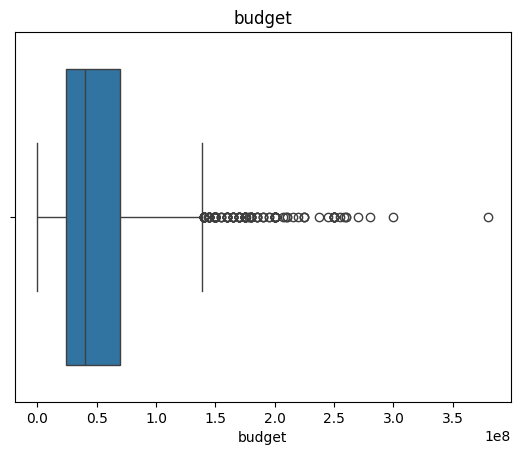

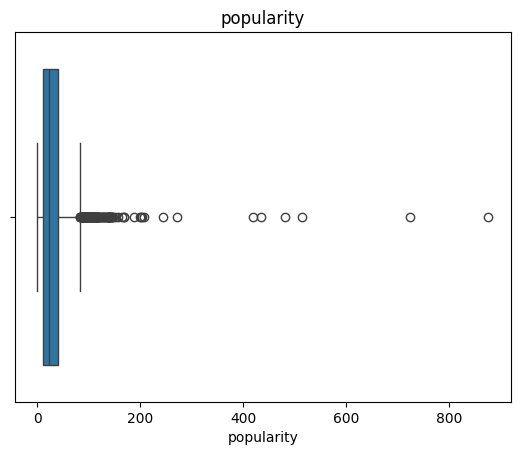

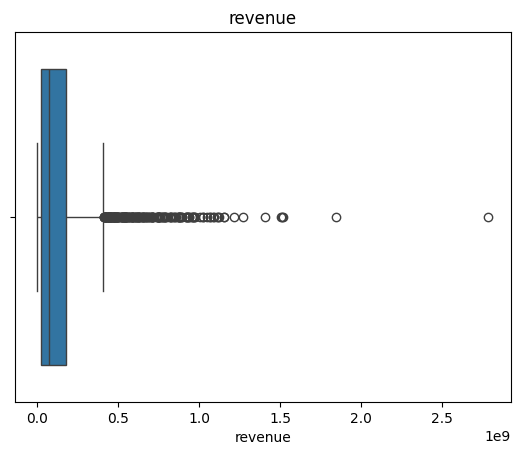

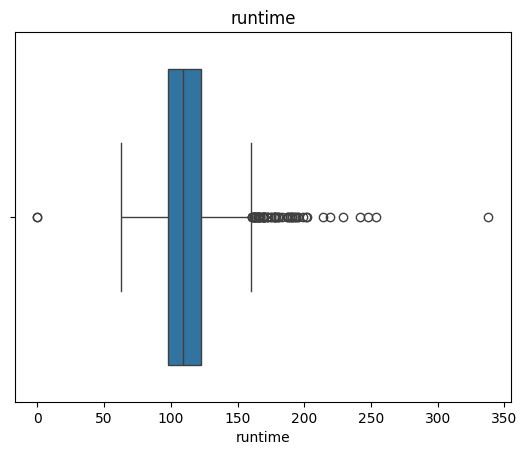

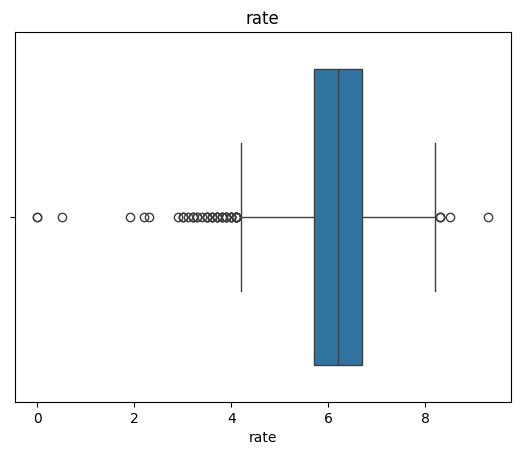

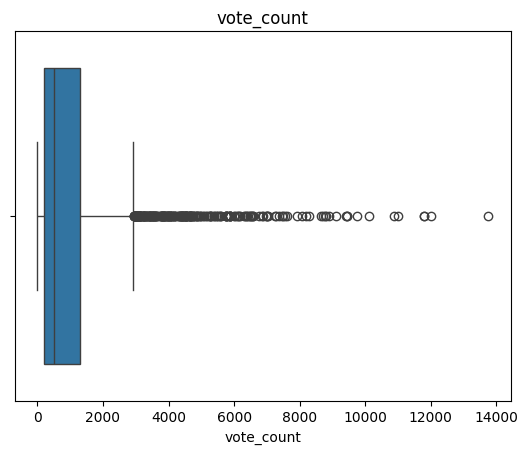

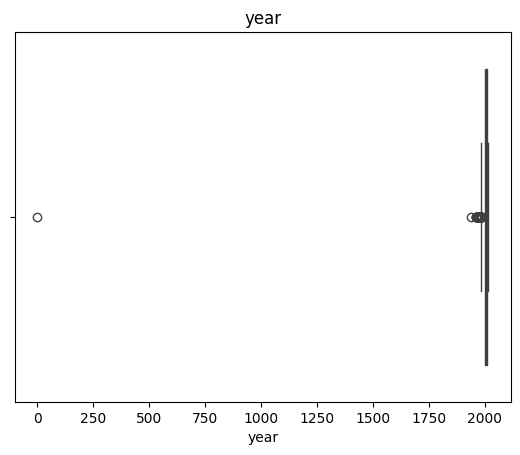

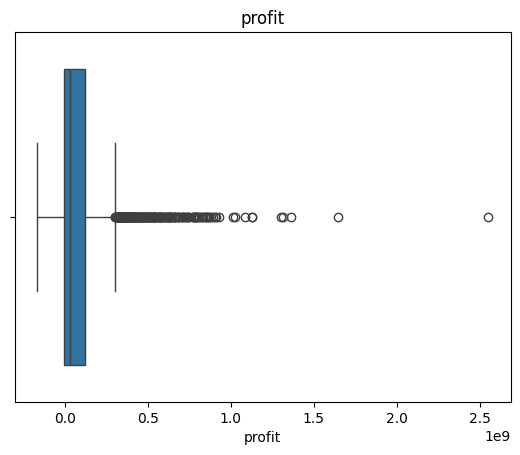

In [21]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
  fig , ax = plt.subplots()
  sns.boxplot(x = df[col])
  ax.set_title(col)
  plt.show()

In [22]:
def remove_outliers_iqr(df, num_cols, factor=1.5):


    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR

        df = df[(df[col] >= lower) & (df[col] <= upper)]

    return df

In [23]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df = remove_outliers_iqr(df, num_cols)

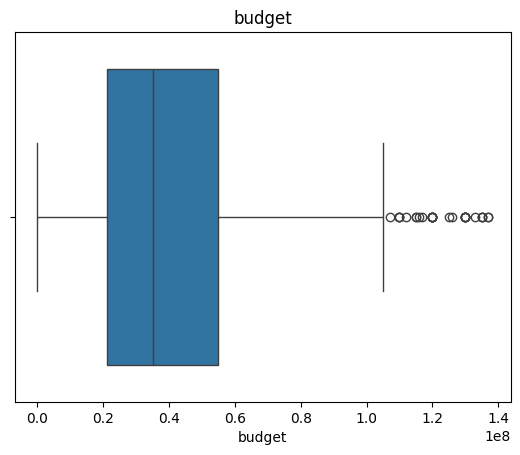

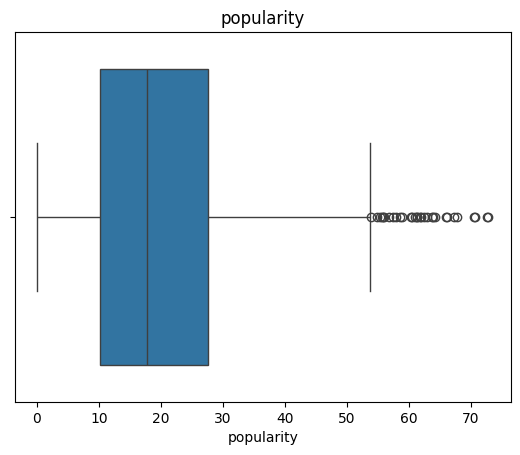

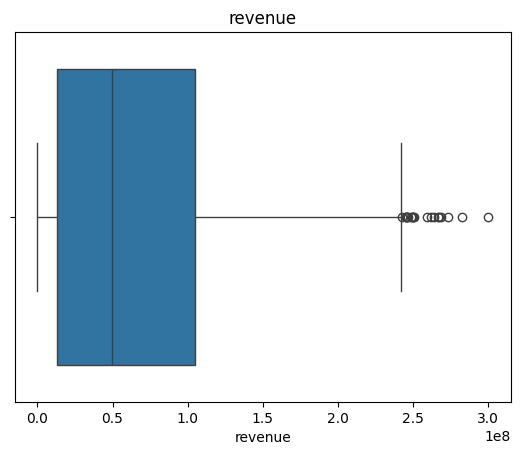

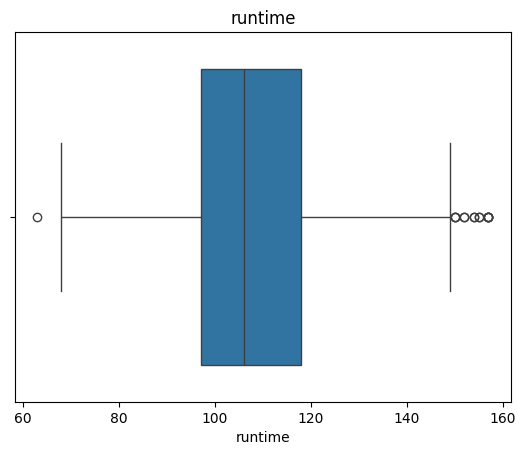

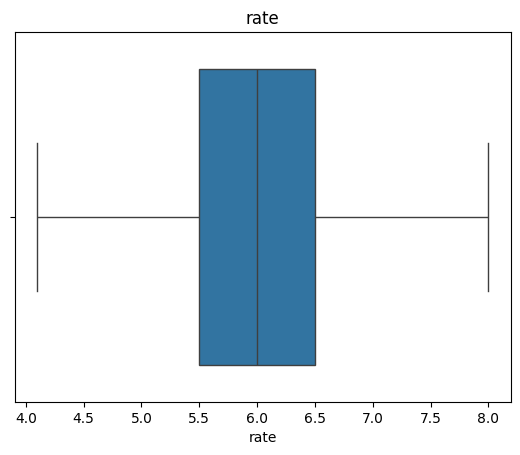

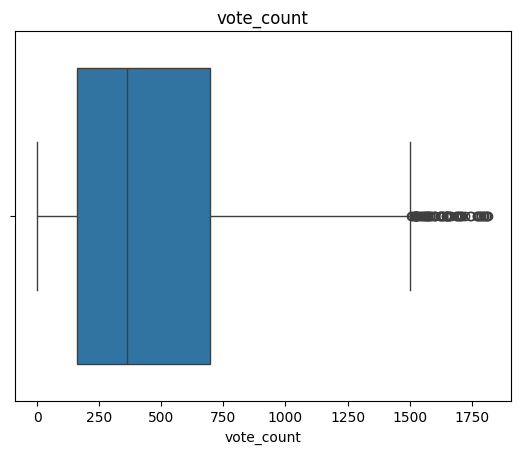

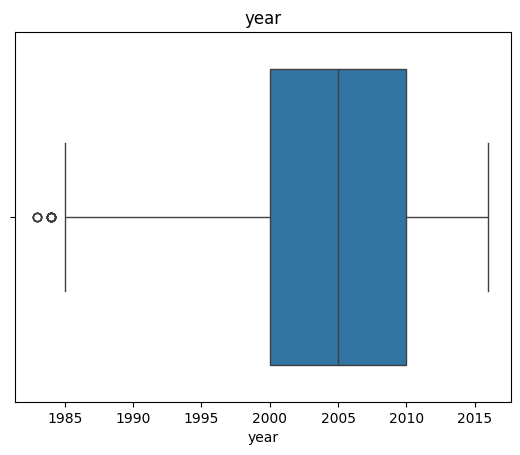

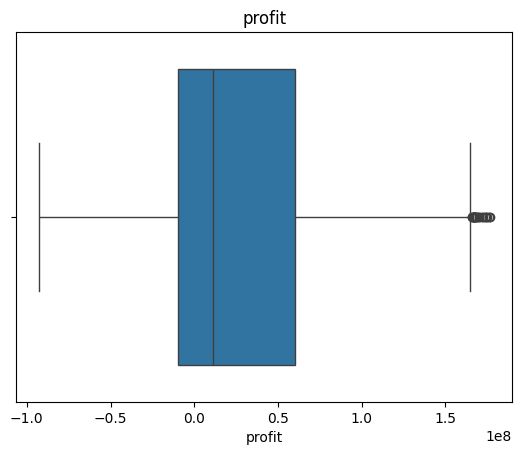

In [24]:
for col in num_cols:
  fig , ax = plt.subplots()
  sns.boxplot(x = df[col])
  ax.set_title(col)
  plt.show()

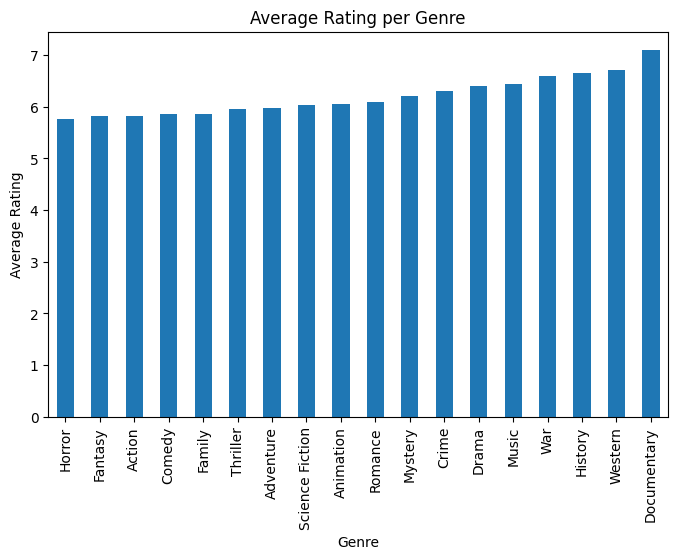

In [25]:
genre_rating = df.groupby('category')['rate'].mean().sort_values()

plt.figure(figsize=(8,5))
genre_rating.plot(kind='bar')
plt.title('Average Rating per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

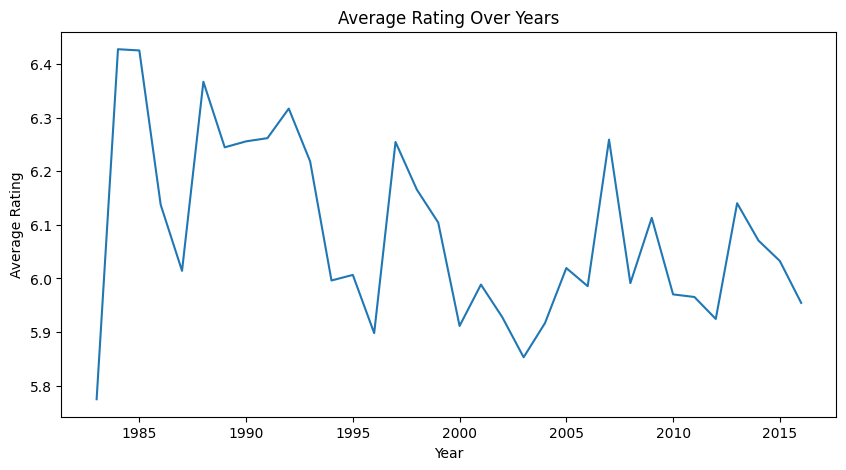

In [26]:
year_rating = df.groupby('year')['rate'].mean()

plt.figure(figsize=(10,5))
plt.plot(year_rating.index, year_rating.values)
plt.title('Average Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

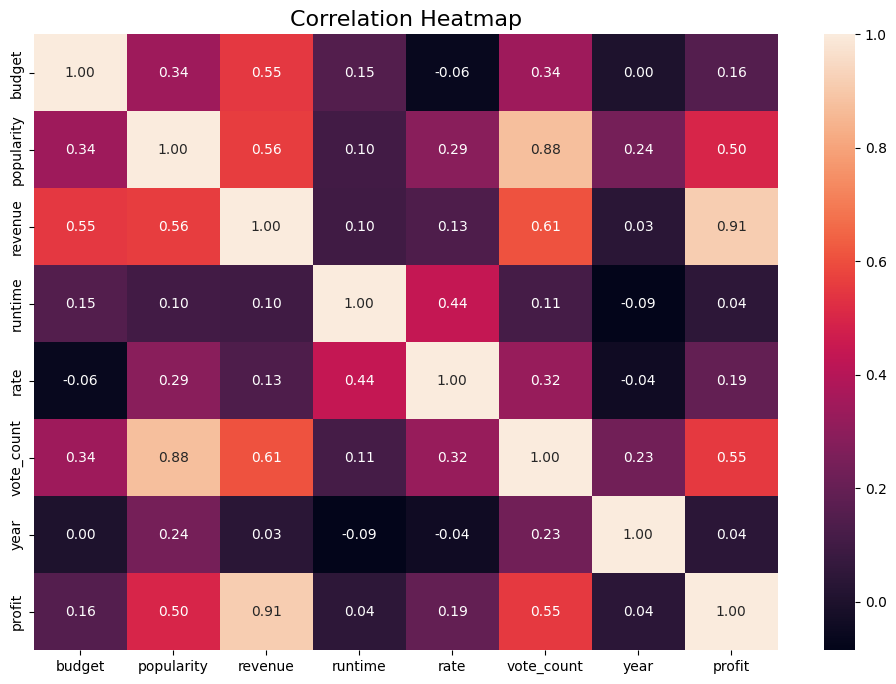

In [27]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
corr = num_cols.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [28]:
cat_cols=['category','production_country','original_language']

In [29]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder_array = encoder.fit_transform(df[cat_cols])

df
df_enncoder = pd.DataFrame(
    encoder_array,
    columns=encoder.get_feature_names_out(cat_cols),
    index=df.index
)


df = pd.concat(
    [
        df.drop(cat_cols, axis=1),
        df_enncoder
    ],
    axis=1
)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1732 entries, 83 to 2433
Data columns (total 79 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   budget                                       1732 non-null   int64  
 1   popularity                                   1732 non-null   float64
 2   revenue                                      1732 non-null   float64
 3   runtime                                      1732 non-null   float64
 4   rate                                         1732 non-null   float64
 5   vote_count                                   1732 non-null   float64
 6   year                                         1732 non-null   float64
 7   profit                                       1732 non-null   float64
 8   category_Action                              1732 non-null   float64
 9   category_Adventure                           1732 non-null   float64
 10  cate

In [31]:
df.isnull().sum()

,0
budget,0
popularity,0
revenue,0
runtime,0
rate,0
...,...
original_language_it,0
original_language_ja,0
original_language_nl,0
original_language_ru,0


In [32]:
X = df.drop('rate', axis=1)
y = df['rate']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [33]:
X_train.isnull().sum().sum(), X_test.isnull().sum().sum()

(np.int64(0), np.int64(0))

In [34]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
lr = LinearRegression()
#fit
lr.fit(X_train_scaled, y_train)
#predict
y_pred_lr = lr.predict(X_test_scaled)

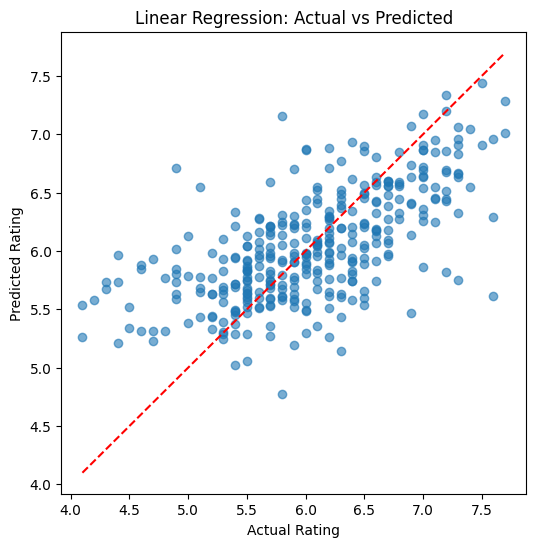

In [36]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--',color='red')
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

In [37]:

poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

y_pred_poly = lr_poly.predict(X_test_poly)

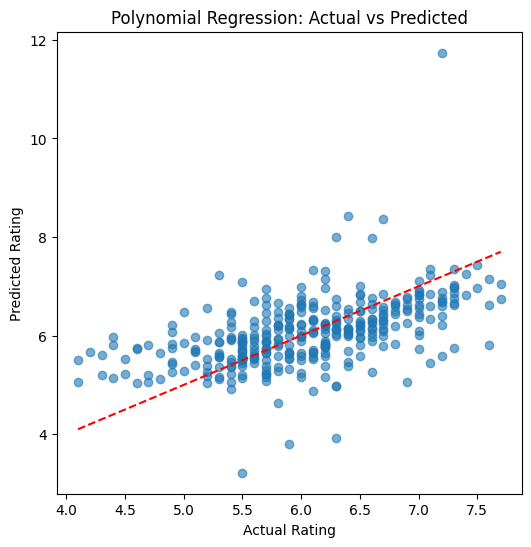

In [38]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_poly, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--',color='red')
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.show()


In [39]:
knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

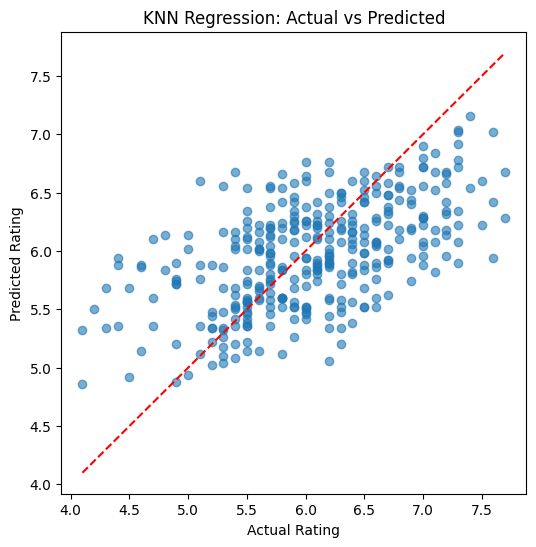

In [40]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_knn, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--',color='red')
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("KNN Regression: Actual vs Predicted")
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Polynomial Regression evaluation
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# KNN Regression evaluation
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("Linear Regression -> MSE:", mse_lr, "R2:", r2_lr)
print("Polynomial Regression -> MSE:", mse_poly, "R2:", r2_poly)
print("KNN Regression -> MSE:", mse_knn, "R2:", r2_knn)

Linear Regression -> MSE: 0.3073541825780253 R2: 0.41823723848432137
Polynomial Regression -> MSE: 0.5006242200655836 R2: 0.05241397301287409
KNN Regression -> MSE: 0.3647515850144092 R2: 0.3095949188479502


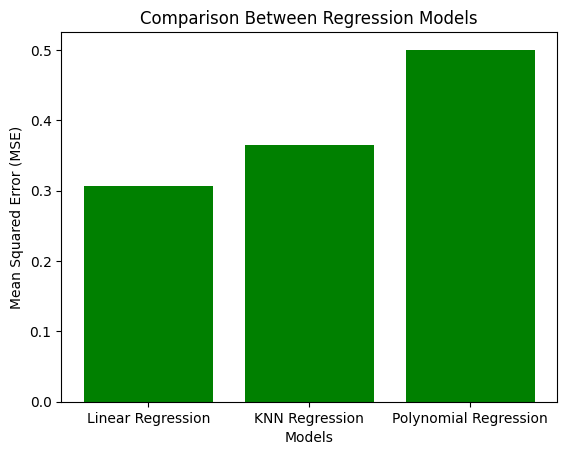

In [42]:
models = ['Linear Regression', 'KNN Regression', 'Polynomial Regression']
mse_values = [mse_lr, mse_knn, mse_poly]

plt.figure()
plt.bar(models, mse_values,color='green')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison Between Regression Models')
plt.show()